# Point clouds interporlation with approximate Wasserstein barycenters

Imports:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import imageio

from src.barycenter import monge_barycenter
%pylab inline

Populating the interactive namespace from numpy and matplotlib


Dimension of images:

In [2]:
N = 70

Load input histograms $(a_k)_{k=1}^R$, store them in a tensor $A$.

In [3]:
rescale = lambda x: (x-x.min())/(x.max()-x.min())
normalize = lambda p: p/np.sum(p)
names = ['disk', 'twodisks', 'letter-x', 'letter-z']
vmin = .01
A = np.zeros([N,N,len(names)])
for i in range(len(names)):
    a = imageio.imread("data/" + names[i] + ".bmp")
    a = normalize(rescale(a)+vmin)
    A[:,:,i] = a

Convert the histograms into point clouds and shift them for visualization:

In [4]:
point_clouds = {}

idxes = np.where(A[:, :, 0]>0.5*np.max(A[:, :, 0]))
circle = np.zeros((len(idxes[0]), 2))
circle[:, 0] = idxes[0]/N
circle[:, 1] = idxes[1]/N
point_clouds[0] = circle

idxes = np.where(A[:, :, 1]>0.5*np.max(A[:, :, 1]))
twodisks = np.zeros((len(idxes[0]), 2))
twodisks[:, 0] = idxes[0]/N + 4
twodisks[:, 1] = idxes[1]/N
point_clouds[1] = twodisks

idxes = np.where(A[:, :, 2]>0.5*np.max(A[:, :, 2]))
letter_x = np.zeros((len(idxes[0]), 2))
letter_x[:, 0] = idxes[0]/N
letter_x[:, 1] = idxes[1]/N + 4
point_clouds[2] = letter_x

idxes = np.where(A[:, :, 3]>0.5*np.max(A[:, :, 3]))
letter_z = np.zeros((len(idxes[0]), 2))
letter_z[:, 0] = idxes[0]/N + 4
letter_z[:, 1] = idxes[1]/N + 4
point_clouds[3] = letter_z

Display the input point clouds:

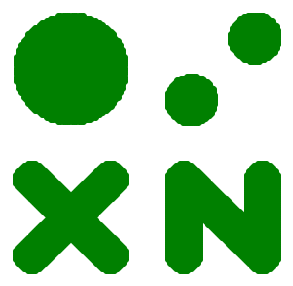

In [5]:
plt.figure(figsize=(5,5))
for i in range(4):
    plt.subplot(2,2,i+1)
    plt.scatter(point_clouds[i][:, 0], point_clouds[i][:, 1], c='g')
    plt.axis('off');

Initialize barycenter approximation by computing the transport plan of each point cloud:

In [6]:
barycenter_computation = monge_barycenter(point_clouds, grid_size=200)

Compute interpolations:

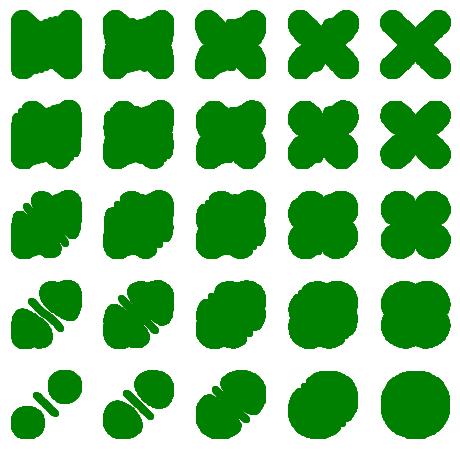

In [7]:
m = 5
[T,S] = np.meshgrid(np.linspace(0, 1, m), np.linspace(0, 1, m))
T = np.ravel(T,order="F")
S = np.ravel(S,order="F")

plt.figure(figsize=(8, 8))

for j in range(m**2):
        # weights
        lambd = np.hstack((S[j]*T[j], (1-S[j])*T[j], S[j]*(1-T[j]), (1-S[j])*(1-T[j])))
        # compute barycenter
        barycenter_computation.fit(list(lambd))
        # visualize result
        plt.subplot(m, m, j+1)
        plt.scatter(barycenter_computation.barycenter[:, 0],
                    barycenter_computation.barycenter[:, 1], c='g')
        plt.axis('off')